In [1]:
import pandas as pd
df = pd.read_csv("../data/train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
def transform_data(df : pd.DataFrame):   
       
    
    # Now drop the columns that are not needed
    df = df.drop([
        "PassengerId",
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare",
        "Embarked",
        "Name",
        "Cabin",
        "Ticket"],
        axis=1)
    
    
    return df

In [4]:
df = transform_data(df)

In [5]:
df.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [6]:
y = df["Survived"]
X = df.drop(["Survived"], axis=1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

class GenderClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X: pd.DataFrame, y=None):
        # based on gender
        result = X
        result["Predictions"] = X["Sex"].apply(lambda x: 0 if x == "male" else 1)
        return result.drop(["Sex"], axis = 1).to_numpy().ravel()
        
    
    def predict_proba(self, X, y=None):
        pass

In [9]:
model = GenderClassifier()

In [10]:
model.predict(X_train)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_predict = model.predict(X_test)

print(f"Accuracy: \t{accuracy_score(y_test, y_test_predict)}")
print(f"Precision: \t{precision_score(y_test, y_test_predict)}")
print(f"Recall: \t{recall_score(y_test, y_test_predict)}")
print(f"F1 Score: \t{f1_score(y_test, y_test_predict)}")

Accuracy: 	0.776536312849162
Precision: 	0.7538461538461538
Recall: 	0.6712328767123288
F1 Score: 	0.7101449275362318


In [12]:
# Test Datensatz
test_kaggle = pd.read_csv("../data/test.csv")
_test_kaggle = test_kaggle.copy()

In [13]:
test_kaggle = transform_data(test_kaggle)

In [14]:
test_kaggle

,Sex
0,male
1,female
2,male
3,male
4,female
...,...
413,male
414,female
415,male
416,male


In [15]:
from datetime import datetime

preds_kaggle = model.predict(test_kaggle)
output = pd.DataFrame({"PassengerId": _test_kaggle["PassengerId"], "Survived": preds_kaggle})
output_path = f"../submissions/submsission {datetime.today().strftime('%Y-%m-%d %H_%M_%S')}.csv"
#output.to_csv(output_path, index=False)

# Oben stehendes Modell mit Entscheidungsbaum abbildbar?

In [16]:
cat_cols = ["Sex"]

In [17]:
# Define pipelines and preprocessor
from sklearn import (compose, impute, linear_model, preprocessing)
from sklearn.pipeline import Pipeline

categorical_preprocessor = Pipeline(steps=[
    ("imputer", impute.SimpleImputer(strategy="most_frequent")),
    ("onehot", preprocessing.OneHotEncoder(handle_unknown="error", sparse_output=False)),
])

preprocessor = compose.ColumnTransformer(
    transformers=[
        ("categorical", categorical_preprocessor, cat_cols),
    ]
)

In [18]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=2))
])

In [19]:
model = pipeline.fit(X_train, y_train)

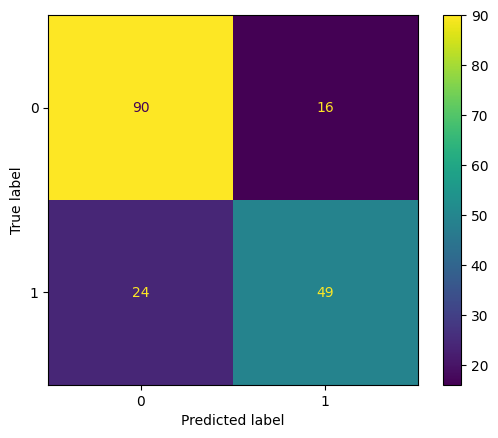

In [20]:
# Konfusionsmatrix und recall sowie precision
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_predict = model.predict(X_test)

print(f"Accuracy: \t{accuracy_score(y_test, y_test_predict)}")
print(f"Precision: \t{precision_score(y_test, y_test_predict)}")
print(f"Recall: \t{recall_score(y_test, y_test_predict)}")
print(f"F1 Score: \t{f1_score(y_test, y_test_predict)}")

Accuracy: 	0.776536312849162
Precision: 	0.7538461538461538
Recall: 	0.6712328767123288
F1 Score: 	0.7101449275362318
